# Final project, Numerical Analysis 2018-2019


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [3]:
def d_infty(a,b):
    
    return np.max(np.abs(b - a))

def d_one(a,b):
    
    return np.sum(np.abs(b - a))

def d_two(a,b):
   
    return sqrt(np.sum((b - a)**2))

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [4]:
def compute_distance(N, dist,data):
    #create distance matrix
    D = zeros((N,N))
    
    for i in range(N):
        for j in range(i + 1, N):
            D[i,j] = D[j,i] = dist(data[i],data[j])
    
    # we can exploit the fact that D is symmetric and use the already computed distances
    return D


# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices


In [5]:
%timeit Dinfty = compute_distance(100, d_infty, x_train)

66.8 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
Dinfty = compute_distance(100, d_infty, x_train)

In [7]:
%timeit D1 = compute_distance(100, d_one, x_train)

37.9 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
D1 = compute_distance(100, d_one, x_train)

In [9]:
%timeit D2 = compute_distance(100, d_two, x_train)


71.7 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
D2 = compute_distance(100, d_two, x_train)


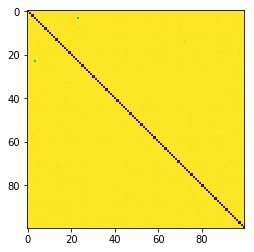

In [11]:
plt.imshow(Dinfty)

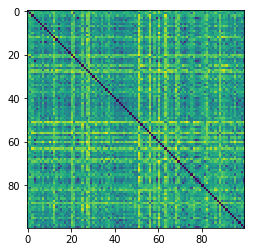

In [12]:
plt.imshow(D1)

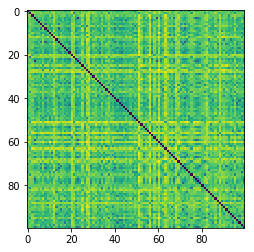

In [13]:
plt.imshow(D2)

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [14]:
def error_rate(D, D_max):
    
    error_counter = 0
    N = len(D)
    
    for i in range(N):
        D[i][i] = D_max
        j = argmin(D[i])
        if(y_train[i] != y_train[j]):
            error_counter += 1
        D[i][i] = 0.0
    return error_counter / N
    

In [15]:
massimo = D1.max()

Einfty = error_rate(Dinfty, massimo)
print("Error rate using Dinfty : ", Einfty)


E1 = error_rate(D1, massimo)
print("Error rate using D1 : ", E1)

E2 = error_rate(D2, massimo)
print("Error rate using D2 : ", E2)

Error rate using Dinfty :  0.58
Error rate using D1 :  0.17
Error rate using D2 :  0.17



# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **

In [16]:

# Pre-computing
N = [100, 200, 400, 800, 1600]
dist = [d_infty, d_one, d_two]
D = [compute_distance(max(N), d, x_train) for d in dist]
# m is the maximum value inside our difference matrices (L1 for 1600x1600)
m = D[1].max()

# Computing the error
%time error_rates_tot = np.array([[error_rate(d[0:n,0:n], m) for d in D] for n in N])
error_rates_tot

Wall time: 43.6 ms


array([[0.58    , 0.17    , 0.17    ],
       [0.52    , 0.145   , 0.135   ],
       [0.4425  , 0.15    , 0.135   ],
       [0.4     , 0.145   , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 ]])

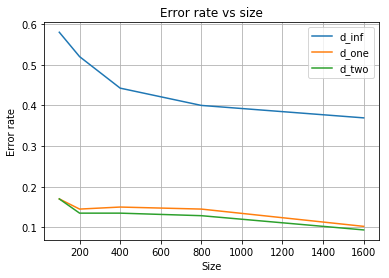

In [17]:
for i in range(len(error_rates_tot.T)):
    plt.plot(N,error_rates_tot.T[i])
_ = plt.title("Error rate vs size")
_ = plt.legend(["d_inf", "d_one", "d_two"])
_ = plt.xlabel("Size")
_ = plt.ylabel("Error rate")
_ = plt.grid()

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

This is the naive version. We can try to exploit linearity and trying to precalulating everything in order to lower the execution time needed.

In [18]:
def normalize_image(a):

    return a / np.sum(a)

def squared_gradient(a):

    gradient = np.gradient(a)
    
    return gradient[0]**2 + gradient[1]**2

def get_normalized_data(data):

    normalized_data = np.zeros((len(data), 28, 28)) 
    
    for image in range(len(data)):
        normalized_data[image] = normalize_image(data[image])
        
    return normalized_data

def d_H1_norm(a, b):

    diff = a - b
    return np.sqrt(sum(squared_gradient(diff) + diff**2))

In [19]:
N = [100, 200, 400, 800, 1600]
normalized_data = get_normalized_data(x_train)
%time D_H1 = compute_distance(max(N), d_H1_norm, normalized_data)
m = D_H1.max()
%time error_rates_H1 = [error_rate(D_H1[0:n, 0:n], m) for n in N]
error_rates_H1



Wall time: 1min 37s
Wall time: 10 ms


[0.23, 0.175, 0.145, 0.12125, 0.099375]

Let's try to optimize the computation of the distance. In order to do that we try to precompute all that we can pre compute.

In [20]:
def compute_gradient(data):
    gradient = np.zeros((len(data), 2, 28, 28))
    
    for image in range(len(gradient)):
        gradient[image] = np.gradient(data[i])
        
    return gradient

def d_H1_optimized(image1, image2, gradient1, gradient2):
    
    diff_grad = np.square(gradient1 - gradient2)
    diff = np.square(image1 - image2)
    
    return np.sqrt(np.sum(diff_grad + diff))

def optimized_matrix_building(N, dist, norm_data, gradients):
    
    D = np.zeros((N, N))
    
    for i in range(N):
        for j in range(i + 1, N):
            D[i,j] = D[j,i] = dist(norm_data[i],norm_data[j], gradients[i], gradients[j])
    
    # we can exploit the fact that D is symmetric and use the already computed distances
    return D


In [21]:
N = [100, 200, 400, 800, 1600]
normalized_data = get_normalized_data(x_train)
gradient_data = compute_gradient(normalized_data)
%time D_H1_opt = optimized_matrix_building(max(N), d_H1_optimized, normalized_data, gradient_data)
m = D_H1.max()
%time error_rates_H1 = np.array([error_rate(D_H1_opt[0:n, 0:n], m) for n in N]).reshape((5,1))

error_rates_tot = np.append(error_rates_tot, error_rates_H1, axis = 1)


Wall time: 26.9 s
Wall time: 11.5 ms


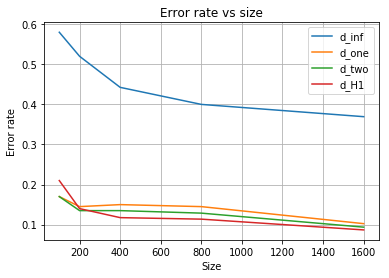

In [23]:
for i in range(len(error_rates_tot.T)):
    plt.plot(N,error_rates_tot.T[i])
_ = plt.title("Error rate vs size")
_ = plt.legend(["d_inf", "d_one", "d_two", "d_H1"])
_ = plt.xlabel("Size")
_ = plt.ylabel("Error rate")
_ = plt.grid()

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [24]:
from scipy.sparse import diags 
from scipy import linalg

def build_laplacian(N):
    """ Builds the N^2 * N^2 matrix for finite difference """
    l_matrix = diags([-1,-1,4,-1,-1],[-N,-1,0,1,N], shape = (N*N,N*N)).toarray()
    for i in range(1,N):
        l_matrix[i*N, (i*N)-1] = 0 # Set to zero every N-1 element
        l_matrix[(i*N)-1, i*N] = 0 # on the +1,-1 diagonals.
    return l_matrix

In [25]:
LU = linalg.lu_factor(build_laplacian(26)) 

def PHI(norm_images, LU):
    
    phis = np.zeros((len(norm_images), 28, 28))
    
    for image in range(len(phis)):
        
        phi = np.zeros((28, 28))
        
        B = norm_images[image][1:27, 1:27].ravel() 
        phi[1:27,1:27] = linalg.lu_solve(LU, B).reshape((26,26)) 
        phis[image] = phi
        
    return phis

%time phi_set = PHI(normalized_data, LU)

Wall time: 27.6 s


In [26]:
def d_MA(a, b, norm_images, phi_set):
    phi = phi_set[a] - phi_set[b]
    sum_images = norm_images[a] + norm_images[b]
    
    return(sum(squared_gradient(phi) * sum_images))

In [27]:
def compute_matrix_d_MA(N, norm_images, phi_set):
    d_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(i+1, N):
            d_matrix[i,j] = d_matrix[j, i] = d_MA(i, j, norm_images, phi_set)
    return d_matrix

In [28]:
%time D_MA = compute_matrix_d_MA(100, normalized_data, phi_set)

Wall time: 319 ms


In [29]:
sizes = [100,200,400,800,1600]

%time d_MA_max_matrix = compute_matrix_d_MA(max(sizes), normalized_data, phi_set)

for N in sizes:
    %time d_MA_matrix = [ d_MA_max_matrix[0:N,0:N]]

Wall time: 1min 32s
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns


In [30]:
errors = np.array([error_rate(d_MA_max_matrix[0:n,0:n], m)  for n in sizes]).reshape((5,1))
errors
error_rates_tot

array([[0.58    , 0.17    , 0.17    , 0.21    ],
       [0.52    , 0.145   , 0.135   , 0.14    ],
       [0.4425  , 0.15    , 0.135   , 0.1175  ],
       [0.4     , 0.145   , 0.12875 , 0.11375 ],
       [0.369375, 0.1025  , 0.09375 , 0.086875]])

In [31]:
error_rates_tot = np.append(error_rates_tot, errors, axis = 1)
error_rates_tot

array([[0.58    , 0.17    , 0.17    , 0.21    , 0.24    ],
       [0.52    , 0.145   , 0.135   , 0.14    , 0.2     ],
       [0.4425  , 0.15    , 0.135   , 0.1175  , 0.145   ],
       [0.4     , 0.145   , 0.12875 , 0.11375 , 0.12875 ],
       [0.369375, 0.1025  , 0.09375 , 0.086875, 0.12125 ]])

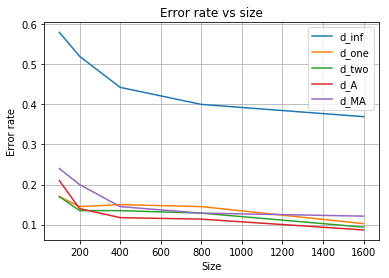

In [32]:
for i in range(len(error_rates_tot.T)):
    plt.plot(sizes,error_rates_tot.T[i])
_ = plt.title("Error rate vs size")
_ = plt.legend(["d_inf", "d_one", "d_two", "d_A","d_MA"])
_ = plt.xlabel("Size")
_ = plt.ylabel("Error rate")
_ = plt.grid()